IMPLEMENTING THE ADALINE IN PYTHON

In [1]:
class Adline_Ago:
    def __init__(self, eta = 0.01,n_rate = 5,random_state = 1):
        self.eta = eta
        self.n_rate = n_rate
        self.random_state = random_state

    def fit(self, X,Y):
        RGEN = np.random.RandomState(self.random_state) # Develop fix number form randoms     
        self.w_ = RGEN.normal(loc = 0.0, scale = 0.01, size = X.shape[1]) # loc = mean, cale = std deviation, size = x dimension; generates no. featires like X in clolun 1

        self.b_ = 0.0
        self.losses_ = []

        for i in range(self.n_rate): #n_rate = epochs

            net_input = self.net_input(X)

            output = self.activation(net_input) #Plalec Holder

            errors = (Y - output)

            self.w_ +=  2 * self.eta * X.T.dot(errors)/ X.shape[0]  # eta is Learning rate # we can also use this: 
            # for w_j in range(self.w_.shape[0]):  self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()

            self.b_ += self.eta * 2 *errors.mean() 

            losses = (errors ** 2).mean()

            self.losses_.append(losses)

        return self




    def activation(self,X):
        return X
    def net_input(self,X):
        return np.dot(X,self.w_) + self.b_ 
        #Based ON linear combination (Z)
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) < 0.5 , 0,1)



In [2]:
import os
import pandas as pd

s = "https://raw.githubusercontent.com/Wizard-hash2/machine-learning-book/refs/heads/main/ch02/iris.data"
df = pd.read_csv(s)

print(df)

     5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]


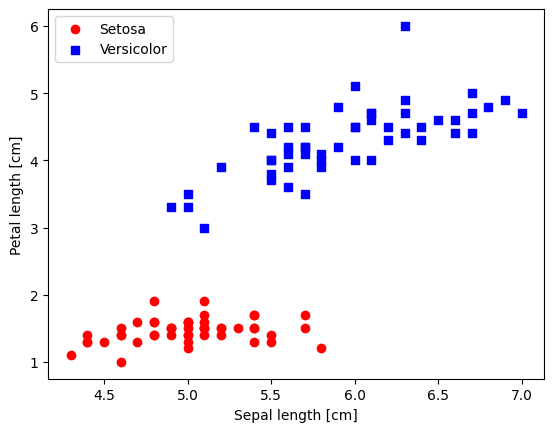

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:49, 0], X[:49, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[49:100, 0], X[49:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

Text(0, 0.5, ' errors')

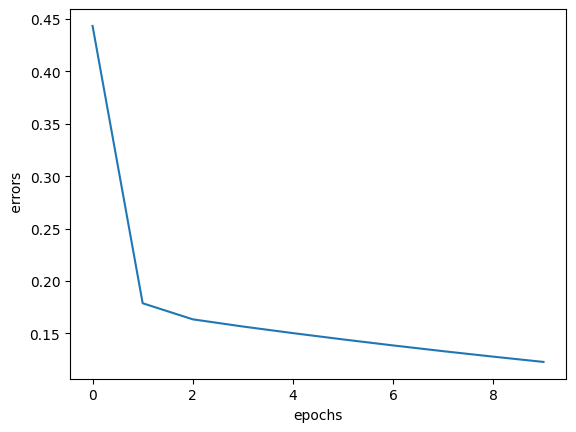

In [4]:
ad = Adline_Ago(eta = 0.01, n_rate= 10) #n rate is epochs
ad.fit(X,y)
plt.plot(range(len(ad.losses_)),(ad.losses_))
plt.xlabel("epochs")
plt.ylabel(" errors")


Lets Try Comparing with different learning rate

Text(0.5, 1.0, 'learning rate of  0.1 against epochs')

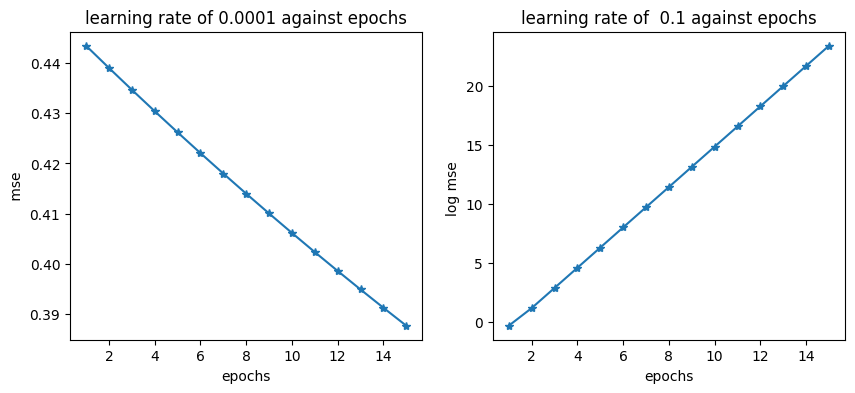

In [5]:
fig,ax = plt.subplots(nrows = 1,ncols= 2, figsize = (10,4))

ad1 = Adline_Ago(eta = 0.0001,n_rate = 15).fit(X,y)

ax[0].plot(range(1, len(ad1.losses_) + 1), (ad1.losses_), marker  = "*")
ax[0].set_ylabel(" mse ")
ax[0].set_xlabel("epochs")
ax[0].set_title("learning rate of 0.0001 against epochs")

ad2 = Adline_Ago(eta = 0.1,n_rate = 15).fit(X,y)
ax[1].plot(range(1, len(ad2.losses_) + 1), np.log10(ad2.losses_), marker  = "*")
ax[1].set_ylabel("log mse ")
ax[1].set_xlabel("epochs")
ax[1].set_title("learning rate of  0.1 against epochs")





# Conslusion
As we can see in the resulting loss function plots, we encountered two different types of problems. The left chart shows what could happen if we choose a learning rate that is too large. Instead of minimizing the loss function, the MSE becomes larger in every epoch, because we overshoot the global minimum. On the other hand, we can see that the loss decreases on the right plot, but the chosen learning rate, , is so small that the algorithm would require a very large number of epochs to converge to the global loss minimum:

In [6]:
x_std=np.copy(X)
x_std[:0] = (x_std[:0] - x_std[:0].mean())/ x_std[:0].std()
x_std[:1] = (x_std[:1] - x_std[:1].mean())/x_std[:1].std()



C:\Users\Aron\AppData\Local\Temp\ipykernel_59352\1058106457.py:2: RuntimeWarning: Mean of empty slice.
  x_std[:0] = (x_std[:0] - x_std[:0].mean())/ x_std[:0].std()
c:\Users\Aron\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Aron\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Aron\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Aron\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
from matplotlib.colors import ListedColormap

def plot_Decision(x,y,classifire, resolution = 0.02):
    markers = "o","*","s","d"
    colors = ("blue","green","red","yellow")
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Creaye a unique color for each value Y



    x_min, x_max =(x[:,0].min()-1,x[:,0].max() + 1) #Padding
    x1_min,x2_max = (x[:,1].min() - 1, x[:1].max() + 1)    
    xx1,xx2 = np.meshgrid(np.arange(x_min,x_max,resolution), np.arange(x1_min,x2_max,resolution)) #Np.arreange(start, stop,increment)
    #meshgrid converts from 1D to ND(2)

    lab = classifire.predict(np.array([xx1.ravel(),  xx2.ravel()]).T) # ravel flatens the values , T is transpose
    lab = lab.reshape(xx1.shape) # xx1 have same shape as xx2

    plt.contourf(xx1,xx2,lab, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y == cl,1 ], color = colors[idx], marker = markers[idx],edgecolor = "black")





    



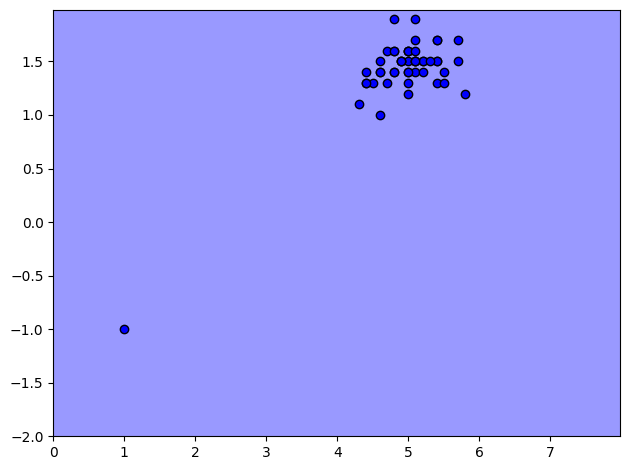

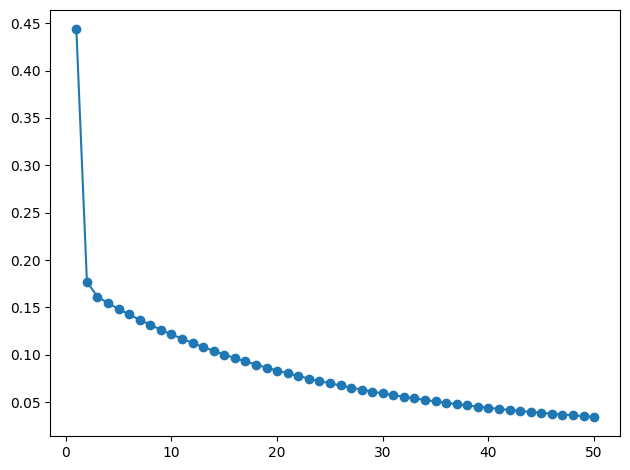

In [13]:
alg_o = Adline_Ago(eta = 0.01, n_rate= 50)
alg_o.fit(x_std,y)
plot_Decision(x_std,y, classifire = alg_o)
plt.tight_layout()
plt.show()

plt.plot(range(1,len(alg_o.losses_) + 1), alg_o.losses_, marker= "o")

plt.tight_layout()

plt.show()

